# Lung Cancer Prediction Data

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### EDA 절차

1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.
6. 데이터 변환 및 피처 엔지니어링
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 활용한다.
7. 데이터 분할
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

### 1. 데이터 로드하기

In [4]:
# !pip install kagglehub

  Using cached kagglehub-0.3.10-py3-none-any.whl.metadata (31 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.10-py3-none-any.whl (63 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/cancer-patients-and-air-pollution-a-new-link")

print("Path to dataset files:", path)

100%|██████████| 7.36k/7.36k [00:00<00:00, 7.53MB/s]

Extracting files...
Path to dataset files: C:\Users\Playdata\.cache\kagglehub\datasets\thedevastator\cancer-patients-and-air-pollution-a-new-link\versions\2


In [20]:
df = pd.read_csv('./data/cancer_patient_data_sets.csv')
df.head() # 맨 앞 인덱스 없애기

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


---

### 2. 데이터 구조 및 기초 통계 확인
- 1000개의 행, 26개의 컬럼
- Patient Id를 제외한 모든 컬럼의 값은 정수형 데이터로 저장

- index: 순서
- Patient Id: 환자 id
- Age: 나이
- Gender: 1(M), 2(F)
- Air Pollution: 환자의 대기 오염 노출 수준 (1-8)
- Alcohol use: 환자의 알코올 사용 수준 (1-8)
- Dust Allergy: 환자의 먼저 알레르기 수준 (1-8)
- OccuPational Hazards: 환자의 직업적 위험 수준 (1-8)
- Genetic Risk: 환자의 유전적 위험 수준 (1-7)
- chronic Lung Disease: 만성 폐질환 수준 (1-7)
- Balanced Diet: 균형잡힌 식단 수준 (1-7)
- Obesity: 비만도 수준 (1-7)
- Smoking: 흡연 수준 (1-8)
- Passive Smoker: 간접흡연 수준 (1-8)
- Chest Pain: 가슴 통증 수준(1-9)
- Coughing of Blood: 기침의 혈액 수준 (1-9)
- Fatigue: 피로 수준 (1-9)
- Weight Loss: 체중 감량 정도 (1-8)
- Shortness of Breath: 호흡곤란 정도 (1-9)
- Wheezing: 천명음(쌕쌕거림) 수준 (1-8)
- Swallowing Difficulty: 환자의 삼키기 어려움 정도 (1-8)
- Clubbing of Finger Nails: 손톱의 곤봉 수준(폐암 초기 증상) (1-9)
- Frequent Cold: 잦은 감기 수준 (1-7)
- Dry Cough: 마른 기침 수준 (1-7)
- Snoring: 코골이 수준 (1-7)

In [9]:
df.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [11]:
df.describe().iloc[:, :10]

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000


In [12]:
df.describe().iloc[:, 10:20]

,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000
std,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000
max,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000


In [13]:
df.describe().iloc[:, 20:]

,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.923000,3.536000,3.853000,2.926000
std,2.388048,1.832502,2.039007,1.474686
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,3.000000
75%,5.000000,5.000000,6.000000,4.000000
max,9.000000,7.000000,7.000000,7.000000


In [14]:
# 데이터 구조를 파악하며 알아낸 것
# 1. index는 필요없는 컬럼 (bc 단순 인덱스)
# 2. 20세 미만, 20세 이상 데이터 나누기 -> bc 20세 미만에게는 alcohol use, Smoking 컬럼이 필요가 없음 그래도 level이 1인지 확인해야 함
# 3. 나이, 성별, 환자id를 제외한 컬럼은 1-7 or 1-8 or 1-9까지의 level로 나눠져 있음

---

### 3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.


In [15]:
df.isnull().sum() # 결측치 없음

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

---

### 4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.

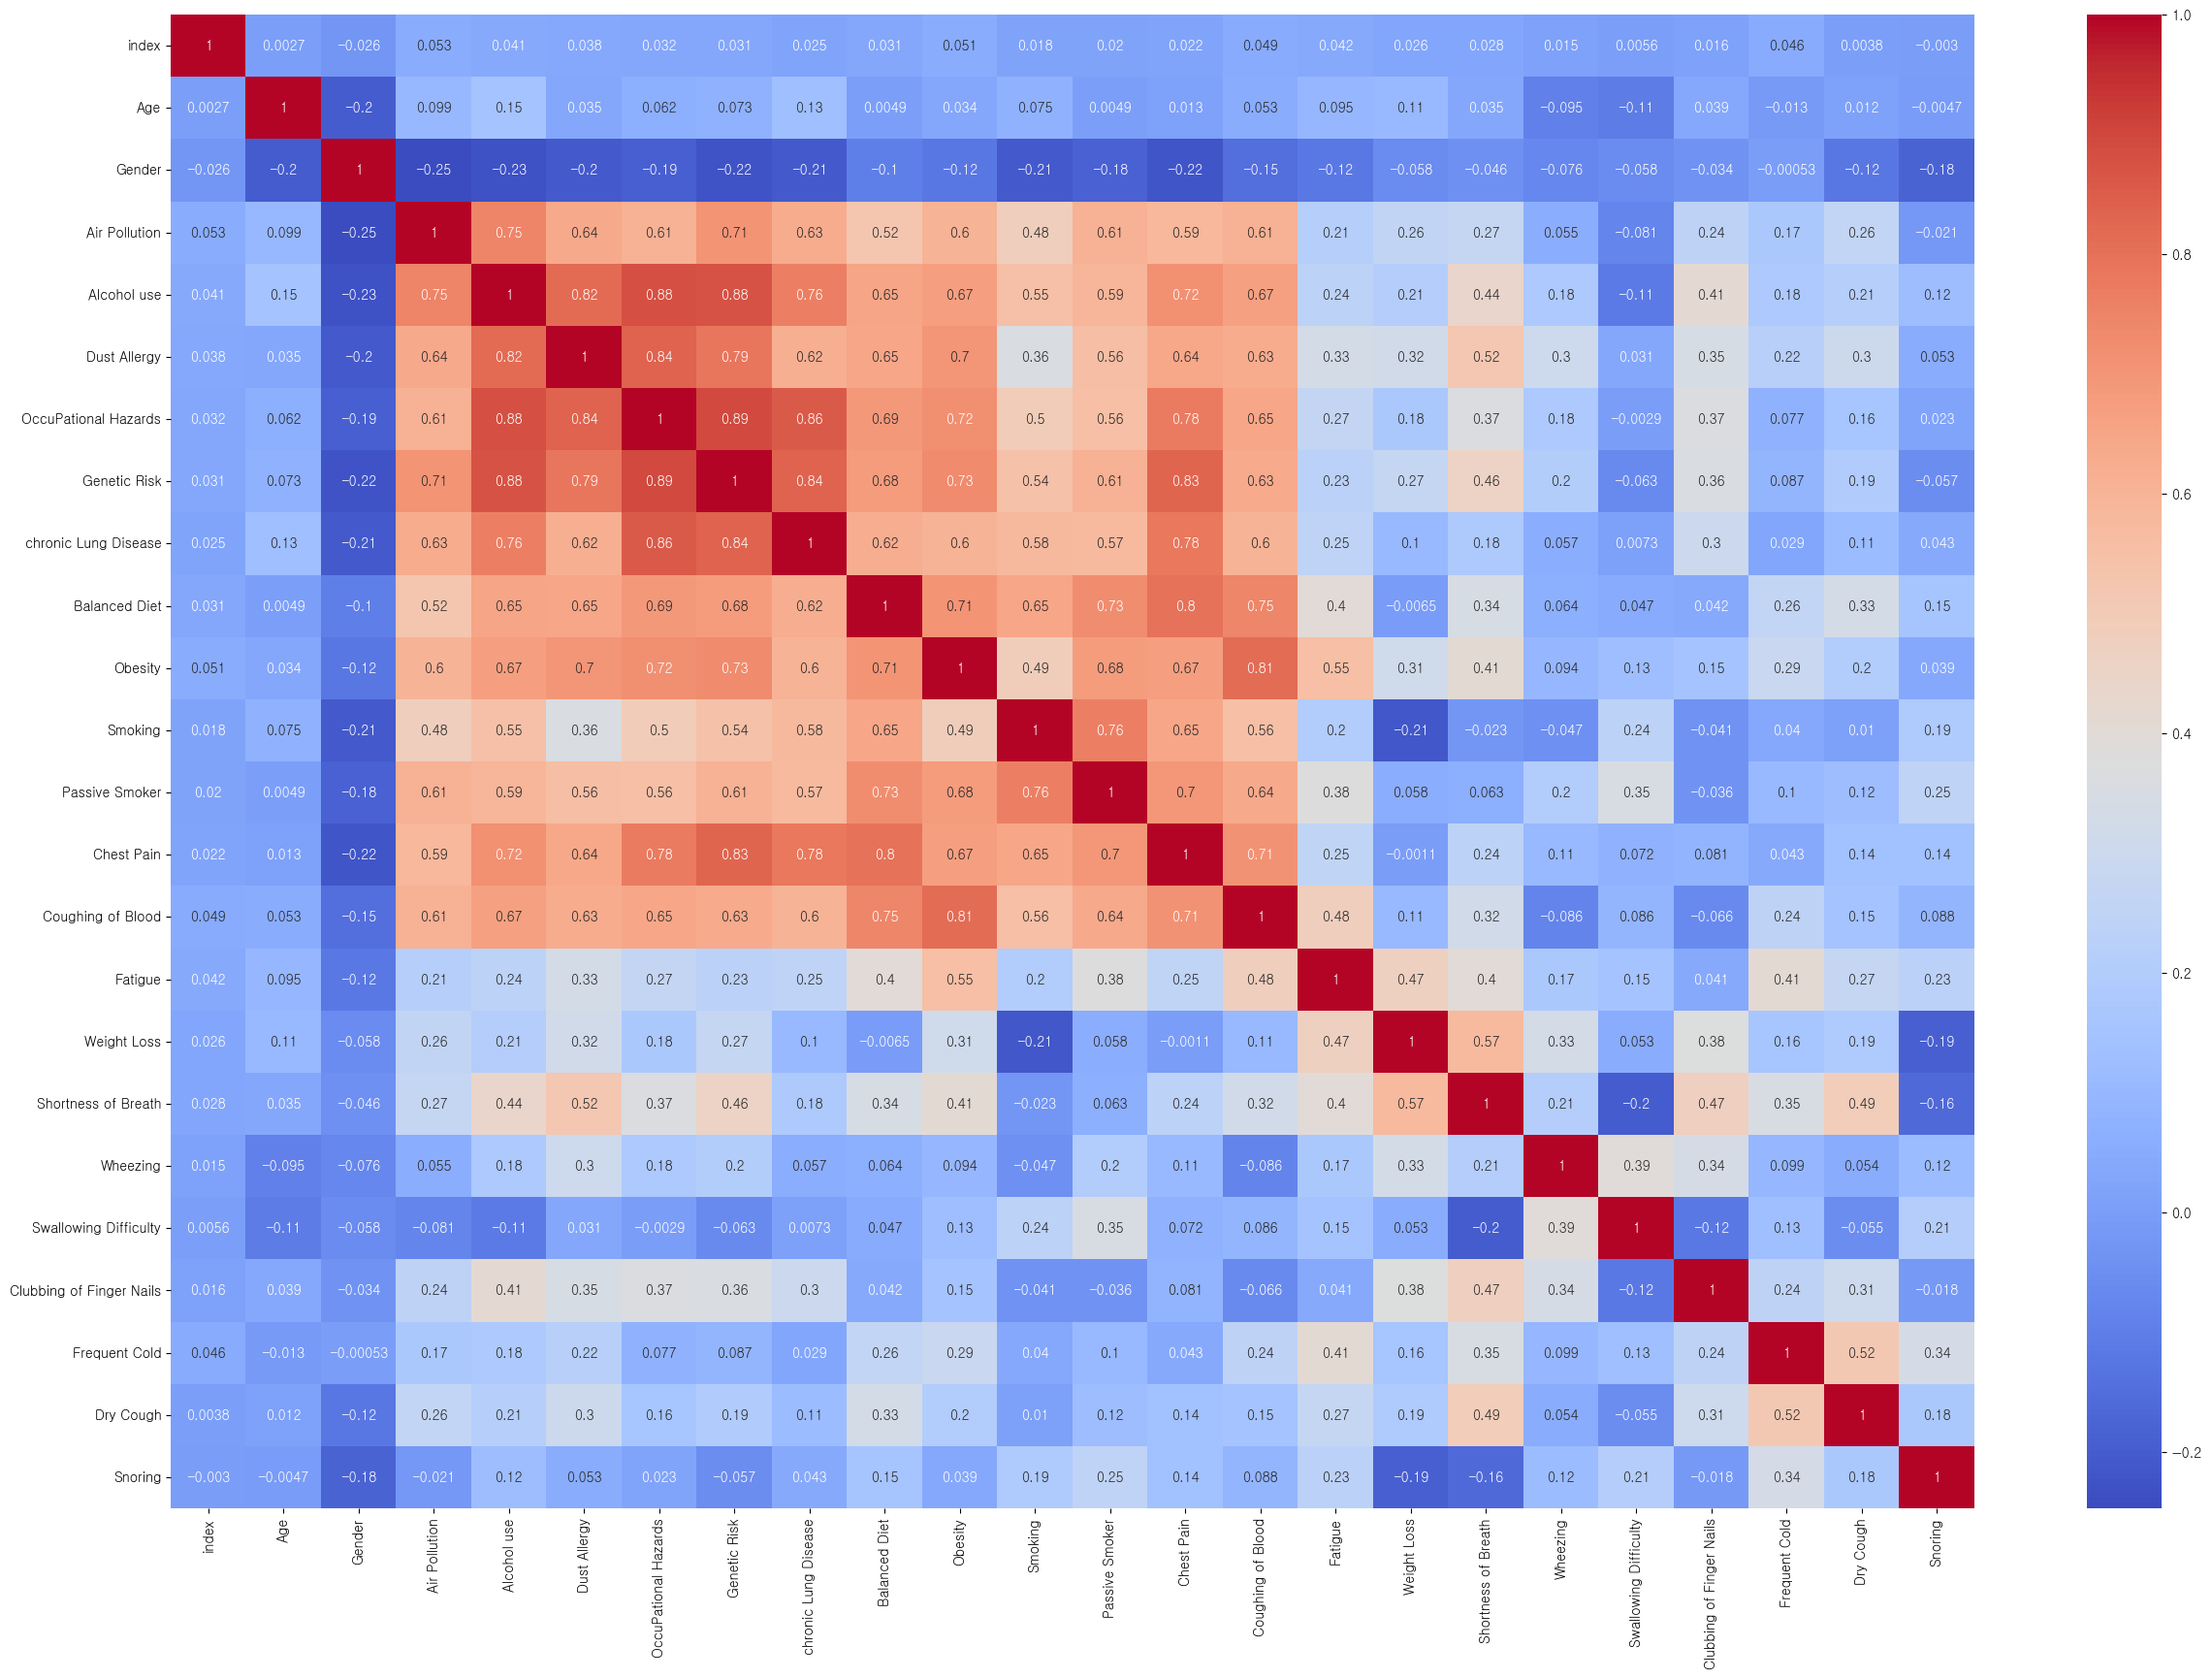

In [21]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [49]:
# 상대적으로 연관이 없는 컬럼 삭제하기

related_df = df.drop(['index',
            'Patient Id',
            'Gender',
              'Fatigue', 
              'Weight Loss', 
              'Shortness of Breath', 
              'Wheezing', 
              'Swallowing Difficulty', 
              'Clubbing of Finger Nails', 
              'Frequent Cold', 
              'Dry Cough',
              'Snoring'],
              axis=1)

related_df['Level'] = related_df['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
related_df

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Level
0,33,2,4,5,4,3,2,2,4,3,2,2,4,1
1,17,3,1,5,3,4,2,2,2,2,4,2,3,2
2,35,4,5,6,5,5,4,6,7,2,3,4,8,3
3,37,7,7,7,7,6,7,7,7,7,7,7,8,3
4,46,6,8,7,7,7,6,7,7,8,7,7,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,8,7,7,3
996,37,6,8,7,7,7,6,7,7,7,8,7,7,3
997,25,4,5,6,5,5,4,6,7,2,3,4,8,3
998,18,6,8,7,7,7,6,7,7,8,7,7,9,3


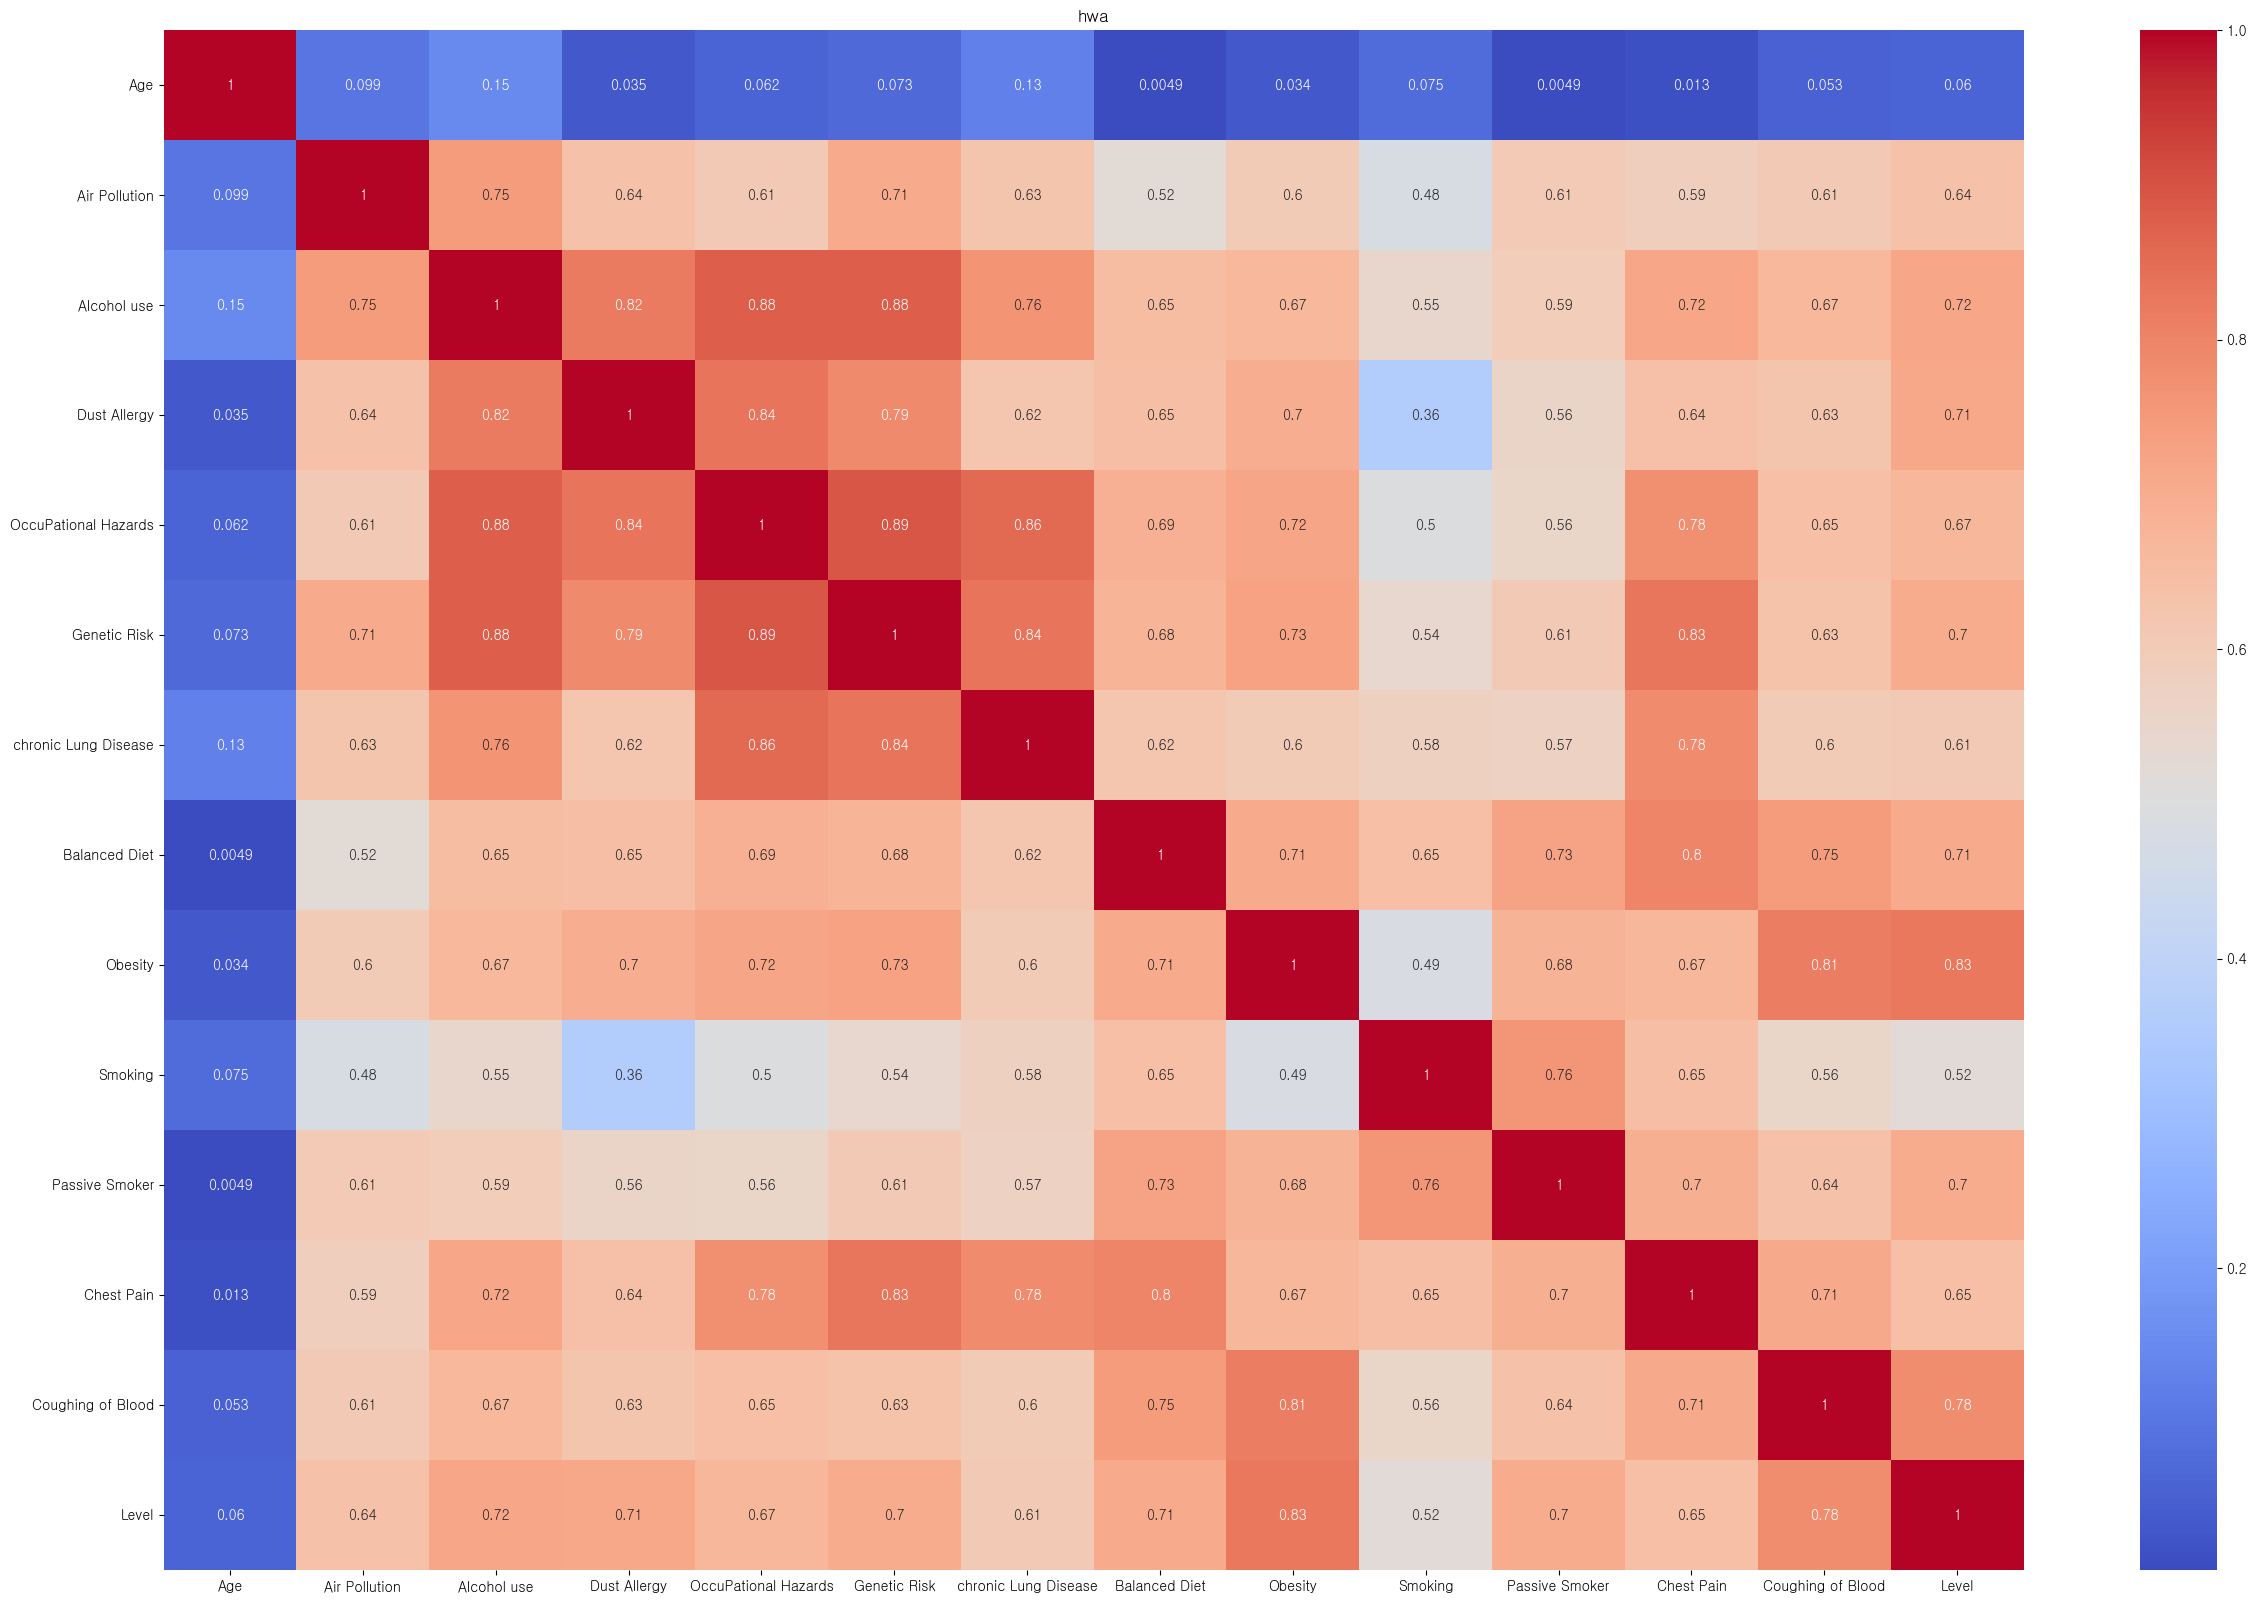

In [50]:
corr_matrix = related_df.corr(numeric_only=True)
corr_matrix

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("hwa")
plt.show()

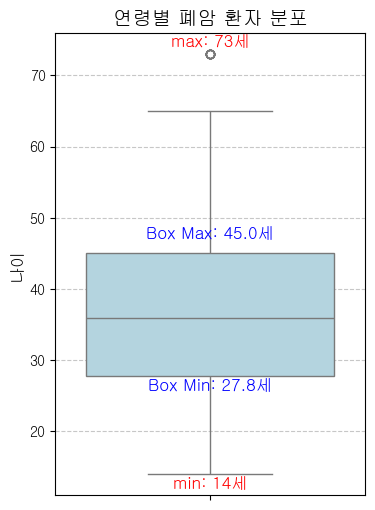

In [51]:
# 연령별 폐암 환자 분포 시각화 
# 폐암 환자의 연령은 대부분 28~45세
plt.figure(figsize=(4, 6))
sns.boxplot(y=related_df['Age'], color='lightblue')

# Q1 (Box의 아래 경계) & Q3 (Box의 위 경계) 구하기
stat = related_df['Age'].describe()
box_min = stat['25%']  # Q1 (Box의 아래쪽 값)
box_max = stat['75%']  # Q3 (Box의 위쪽 값)
age_min = related_df['Age'].min()
age_max = related_df['Age'].max()

# 값 표시
plt.text(0, box_min - 2, f"Box Min: {box_min:.1f}세", ha='center', color='blue', fontsize=12)
plt.text(0, box_max + 2, f"Box Max: {box_max:.1f}세", ha='center', color='blue', fontsize=12)
plt.text(0, age_min - 2, f"min: {age_min}세", ha='center', color='red', fontsize=12)
plt.text(0, age_max + 1, f"max: {age_max}세", ha='center', color='red', fontsize=12)


plt.title("연령별 폐암 환자 분포", fontsize=14, fontweight='bold')
plt.ylabel("나이", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text
plt.show()

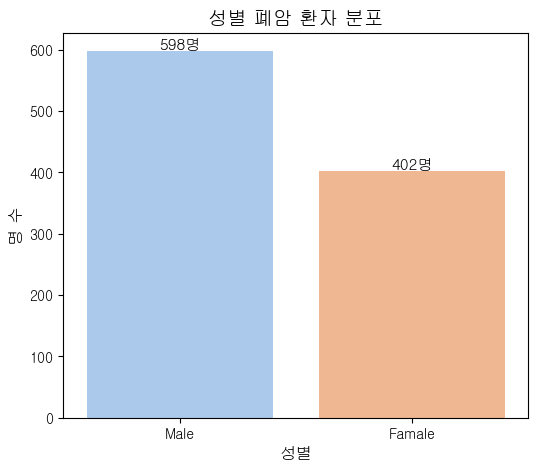

In [52]:
# 성별 폐암 환자 분포 시각화

# Gender 숫자 → 텍스트 변환
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Famale'})

# 그래프 그리기
plt.figure(figsize=(6, 5))
ax = sns.countplot(x=df['Gender'], palette='pastel')

# 각 bar 위에 개수 추가
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2  # 막대의 중심
    y = bar.get_height()  # 막대 높이
    label = bar.get_x()  # Male, Female 라벨
    plt.text(x, y + 3, f"{int(y)}명", ha='center', fontsize=11, fontweight='bold', color='black')

plt.title("성별 폐암 환자 분포", fontsize=14, fontweight='bold')
plt.xlabel("성별", fontsize=12)
plt.ylabel("명 수", fontsize=12)
plt.show()


In [53]:
under_20_df = related_df[related_df['Age']<20]
over_20_df = related_df[related_df['Age']>=20]

In [54]:
under_20_df.info() # 67개의 entry

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1 to 998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   67 non-null     int64
 1   Air Pollution         67 non-null     int64
 2   Alcohol use           67 non-null     int64
 3   Dust Allergy          67 non-null     int64
 4   OccuPational Hazards  67 non-null     int64
 5   Genetic Risk          67 non-null     int64
 6   chronic Lung Disease  67 non-null     int64
 7   Balanced Diet         67 non-null     int64
 8   Obesity               67 non-null     int64
 9   Smoking               67 non-null     int64
 10  Passive Smoker        67 non-null     int64
 11  Chest Pain            67 non-null     int64
 12  Coughing of Blood     67 non-null     int64
 13  Level                 67 non-null     int64
dtypes: int64(14)
memory usage: 7.9 KB


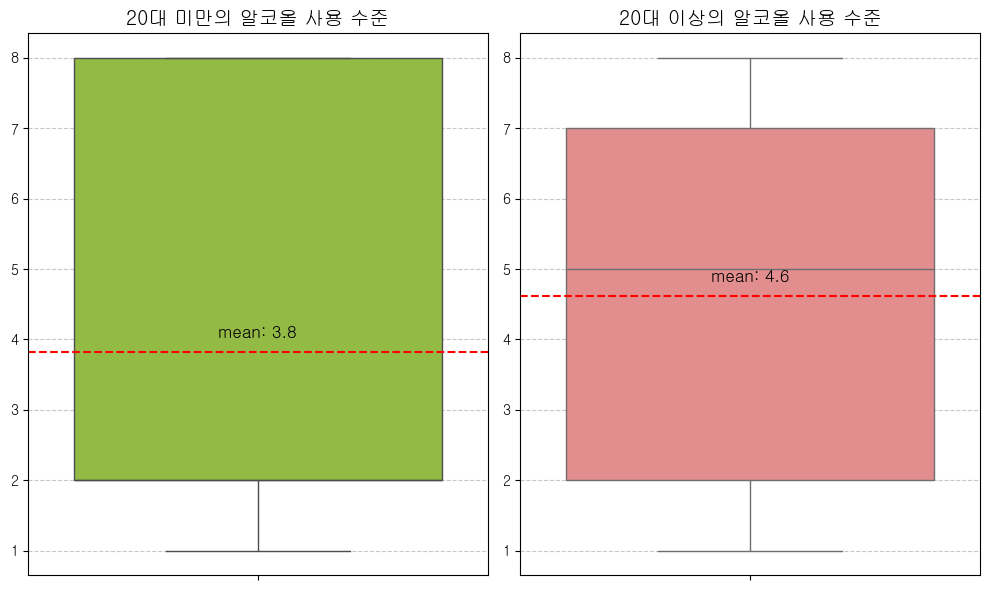

In [55]:
# 20대 미만과 20대 이상의 알코올 사용 수준 -> 크게 차이 안남

plt.figure(figsize=(10, 6))

# 첫 번째 서브플롯: 20대 미만의 알코올 사용 수준
plt.subplot(1, 2, 1)  # 1행 2열, 첫 번째 그래프
sns.boxplot(y=under_20_df['Alcohol use'], color='yellowgreen')
alcohol_use_mean_under_20 = under_20_df['Alcohol use'].mean()
plt.axhline(alcohol_use_mean_under_20, color='red', linestyle='--', linewidth=1.5)
plt.text(0, alcohol_use_mean_under_20 + 0.2, f"mean: {alcohol_use_mean_under_20:.1f}", ha='center', color='black', fontsize=12)

plt.title("20대 미만의 알코올 사용 수준", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 두 번째 서브플롯: 20대 이상의 알코올 사용 수준
plt.subplot(1, 2, 2)  # 1행 2열, 두 번째 그래프
sns.boxplot(y=over_20_df['Alcohol use'], color='lightcoral')
alcohol_use_mean_over_20 = over_20_df['Alcohol use'].mean()
plt.axhline(alcohol_use_mean_over_20, color='red', linestyle='--', linewidth=1.5)
plt.text(0, alcohol_use_mean_over_20 + 0.2, f"mean: {alcohol_use_mean_over_20:.1f}", ha='center', color='black', fontsize=12)

plt.title("20대 이상의 알코올 사용 수준", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

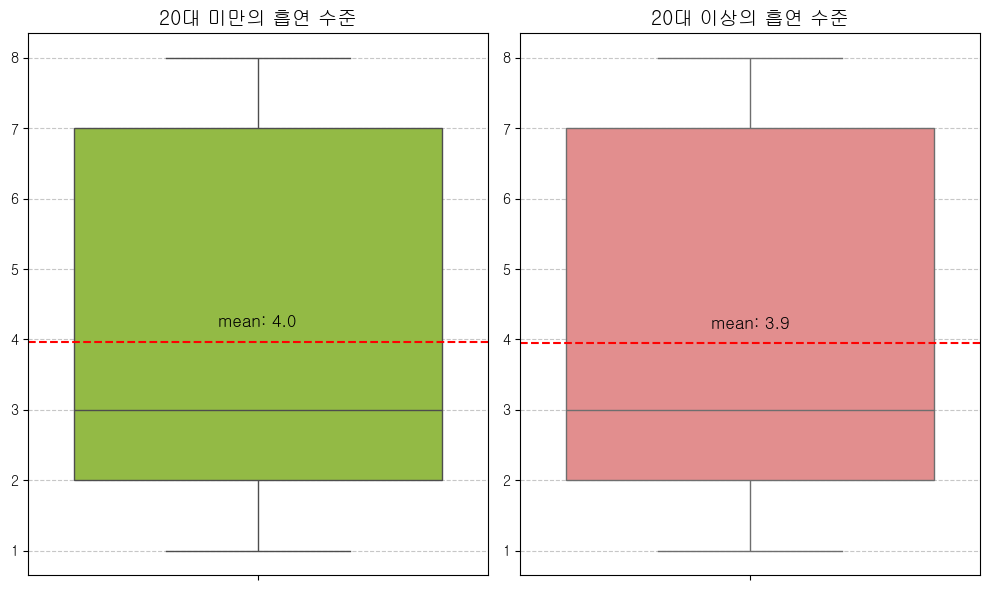

In [56]:
# 20대 미만과 20대 이상의 흡연 수준 -> 오히려 20대 미만이 높음

plt.figure(figsize=(10, 6))

# 첫 번째 서브플롯: 20대 미만
plt.subplot(1, 2, 1)  # 1행 2열, 첫 번째 그래프
sns.boxplot(y=under_20_df['Smoking'], color='yellowgreen')
alcohol_use_mean_under_20 = under_20_df['Smoking'].mean()
plt.axhline(alcohol_use_mean_under_20, color='red', linestyle='--', linewidth=1.5)
plt.text(0, alcohol_use_mean_under_20 + 0.2, f"mean: {alcohol_use_mean_under_20:.1f}", ha='center', color='black', fontsize=12)

plt.title("20대 미만의 흡연 수준", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 두 번째 서브플롯: 20대 이상
plt.subplot(1, 2, 2)  # 1행 2열, 두 번째 그래프
sns.boxplot(y=over_20_df['Smoking'], color='lightcoral')
alcohol_use_mean_over_20 = over_20_df['Smoking'].mean()
plt.axhline(alcohol_use_mean_over_20, color='red', linestyle='--', linewidth=1.5)
plt.text(0, alcohol_use_mean_over_20 + 0.2, f"mean: {alcohol_use_mean_over_20:.1f}", ha='center', color='black', fontsize=12)

plt.title("20대 이상의 흡연 수준", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

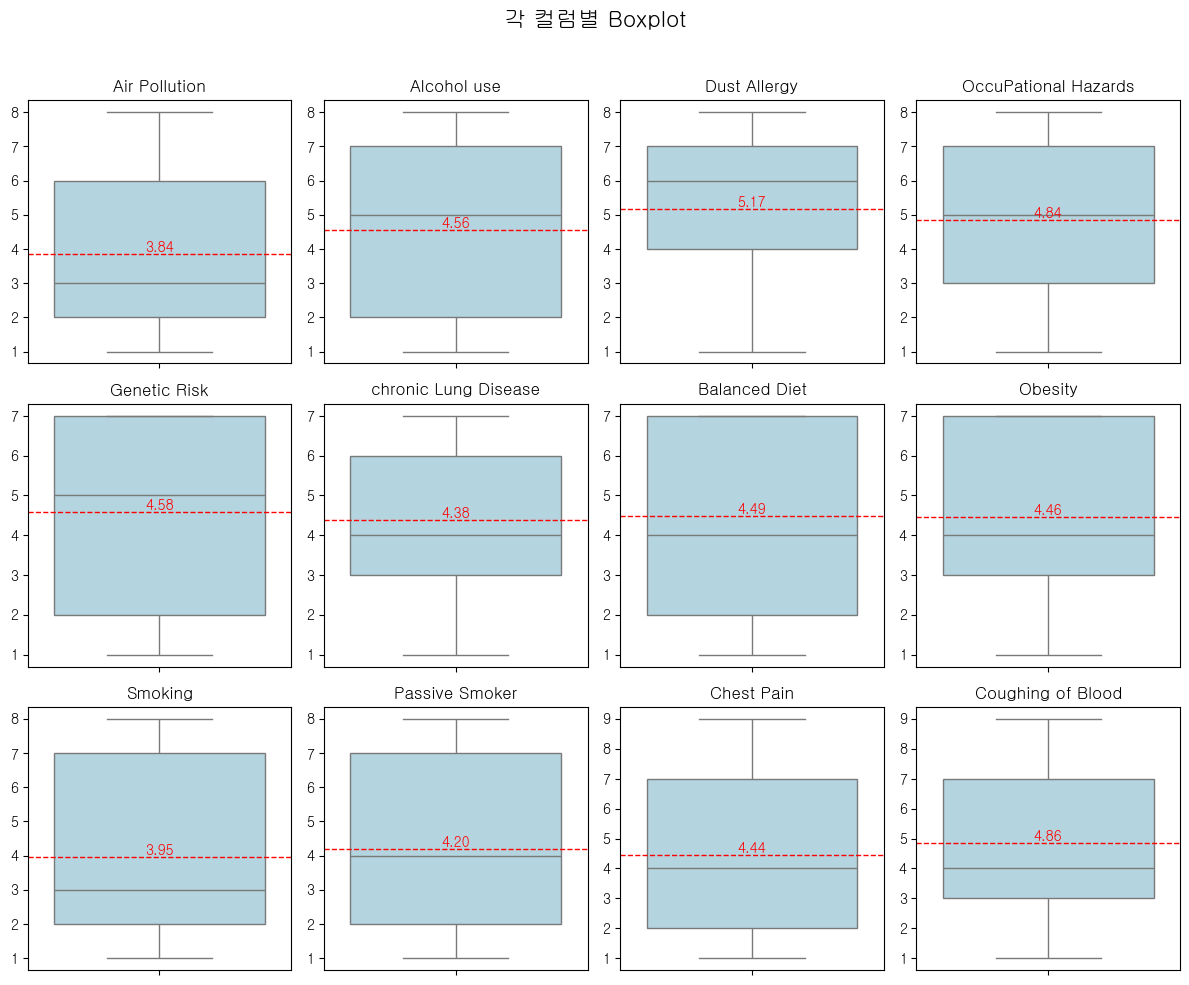

In [ ]:
# 각 컬럼별 boxplot (age, level 제외)
fig, axes = plt.subplots(3, 4, figsize=(12, 10))  # 4x2 그리드로 배치
fig.suptitle("각 컬럼별 Boxplot", fontsize=16, fontweight='bold')

# 컬럼별로 boxplot 생성
for ax, col in zip(axes.flatten(), related_df.columns[1:13]):
    sns.boxplot(y=df[col], ax=ax, color='lightblue')

    # 평균값 계산 및 표시
    mean_value = related_df[col].mean()
    ax.axhline(mean_value, color='red', linestyle='--', linewidth=1)  # 평균선 추가
    ax.text(0, mean_value, f"{mean_value:.2f}", ha='center', va='bottom', 
            color='red', fontsize=10, fontweight='bold')  # 평균값 텍스트 추가

    ax.set_title(col, fontsize=12)  # 각 subplot 제목
    ax.set_xlabel("")  # x축 라벨 제거
    ax.set_ylabel("")  # y축 라벨 제거

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
plt.show()

In [ ]:
# 이상치라고 지정하는 이유
# IQR 방법 사용하기
# bc 데이터가 비대칭적이고 정규분포를 따르지 않기 때문에 z-score 대신 IQR 사용

In [ ]:
# 으악 별로인거같아
columns_to_check = related_df.columns  # 이상치를 체크할 컬럼들

# 각 컬럼에 대해 이상치 계산
outliers_dict = {}  # 컬럼별 이상치를 저장할 딕셔너리

for col in columns_to_check:
    Q1 = related_df[col].quantile(0.25)
    Q3 = related_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 찾기
    outliers = related_df[(related_df[col] < lower_bound) | (related_df[col] > upper_bound)]
    
    # 결과를 딕셔너리에 저장
    outliers_dict[col] = outliers
print(outliers_dict)

{'Age':      Age  Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
15    73              5            6             6                     5   
126   73              5            6             6                     5   
237   73              5            6             6                     5   
348   73              5            6             6                     5   
459   73              5            6             6                     5   
570   73              5            6             6                     5   
681   73              5            6             6                     5   
792   73              5            6             6                     5   
889   73              5            6             6                     5   
903   73              5            6             6                     5   

     Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  Smoking  \
15              6                     5              6        5        8   
126